### <center>**Data Analysis of Premier League**</center>

##### This is a jupyter notebook which analyzes the data and gives meaningful insights from the premier league table since it's inception on 1992, upto 2018. The new season is not added as the current league is going on (2018/2019).  The data is scraped from workfootball.net. Only the premier league table is scrapped and the data is analyzed. Minimal libraries are used to analyze the data.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

In [2]:
# # # Given
start_season_year = 1992
end_season_year = 2018
total_seasons = 26   # # (1992-2018)
total_teams = 20
relegation_count = 3
relegation_threshold = 18
column_headers = ['Teams', 'M', 'W', 'D', 'L', 'Goals', 'Diff', 'Pts']

In [3]:
data_dictionary = {}
for i in range(total_seasons):
    season_date = i + start_season_year
    data_dictionary[season_date] = pd.read_csv('../data/https___www.worldfootball.net_ ({0}).csv'.format(i), header=None, index_col=0)
    
    individual_dataframe = data_dictionary[season_date]
    
    # # Remove unknown columns
    del individual_dataframe[9]
    del individual_dataframe[10]
    
    # # Remove unknown index
    individual_dataframe.drop(individual_dataframe.index[:2], inplace=True)
    
    # # Good Columns Names
    individual_dataframe.columns = column_headers
    
    individual_dataframe = individual_dataframe.rename_axis(None, inplace=True)

### <center>**Premier League Table 2003/2004**</center>

In [4]:
data_dictionary[2003]

,Teams,M,W,D,L,Goals,Diff,Pts
1,Arsenal FC,38,26,12,0,73:26,47,90
2,Chelsea FC,38,24,7,7,67:30,37,79
3,Manchester United,38,23,6,9,64:35,29,75
4,Liverpool FC,38,16,12,10,55:37,18,60
5,Newcastle United,38,13,17,8,52:40,12,56
6,Aston Villa,38,15,11,12,48:44,4,56
7,Charlton Athletic,38,14,11,13,51:51,0,53
8,Bolton Wanderers,38,14,11,13,48:56,-8,53
9,Fulham FC,38,14,10,14,52:46,6,52
10,Birmingham City,38,12,14,12,43:48,-5,50


### <center>**Search for the most successful club's in England**<center/>

In [5]:
# # # Creating a Winner's dictionary with clubs and their respective title winning years
winners_dict = {}
winners_hist = {}
for i in range(total_seasons):
    season_date = i + start_season_year
    winner_club = data_dictionary[season_date].loc['1'][0]
    winners_dict[season_date] = winner_club
    
    # # For Winners Histogram
    if winner_club in winners_hist:
        winners_hist[winner_club] += 1
    else:
        winners_hist[winner_club] = 1

In [6]:
winners_hist

{'Manchester United': 13,
 'Blackburn Rovers': 1,
 'Arsenal FC': 3,
 'Chelsea FC': 5,
 'Manchester City': 3,
 'Leicester City': 1}

In [7]:
winners_dict

{1992: 'Manchester United',
 1993: 'Manchester United',
 1994: 'Blackburn Rovers',
 1995: 'Manchester United',
 1996: 'Manchester United',
 1997: 'Arsenal FC',
 1998: 'Manchester United',
 1999: 'Manchester United',
 2000: 'Manchester United',
 2001: 'Arsenal FC',
 2002: 'Manchester United',
 2003: 'Arsenal FC',
 2004: 'Chelsea FC',
 2005: 'Chelsea FC',
 2006: 'Manchester United',
 2007: 'Manchester United',
 2008: 'Manchester United',
 2009: 'Chelsea FC',
 2010: 'Manchester United',
 2011: 'Manchester City',
 2012: 'Manchester United',
 2013: 'Manchester City',
 2014: 'Chelsea FC',
 2015: 'Leicester City',
 2016: 'Chelsea FC',
 2017: 'Manchester City'}

<BarContainer object of 6 artists>

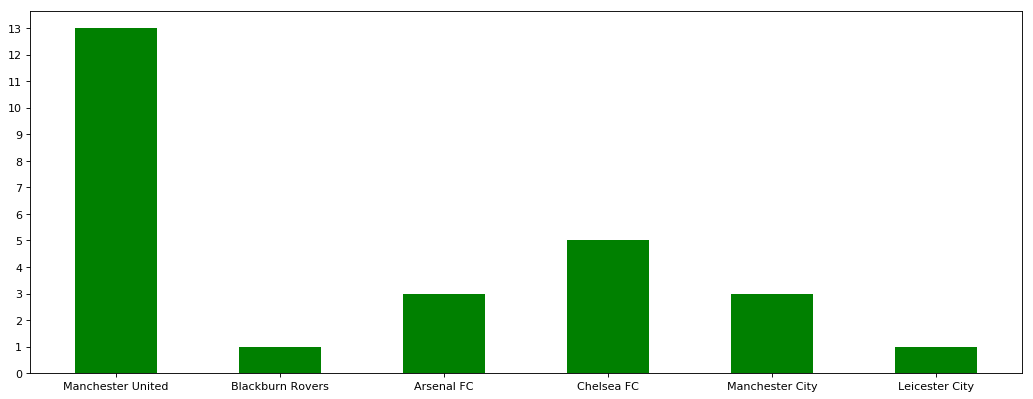

In [8]:
width = 0.5
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

y_ticks = np.arange(0, 15)
plt.yticks(y_ticks)

plt.bar(winners_hist.keys(), winners_hist.values(), width, color='green')

##### <center>This figure shows that the most successful club in the modern era of premier league is Manchester United</center>

### <center>**Search for the most season with a close difference**</center>

##### <center>Calculating the seasons with the difference in points between the highest placed team and the lowest placed team. This stats will show the competitiveness between the teams from top to bottom. This closer the difference, the more chance for each and every club, more the entertaining season.</center>

In [9]:
# # Getting the difference in points season
difference_hist = {}
difference_points = []
for i in range(total_seasons):
    season_date = i + start_season_year

    winner_point = data_dictionary[season_date].loc['1'][7]
    loser_point = data_dictionary[season_date].loc['20'][7]
    
    difference_points.append(int(winner_point) - int(loser_point))
    difference_hist[season_date] = (int(winner_point), int(loser_point))

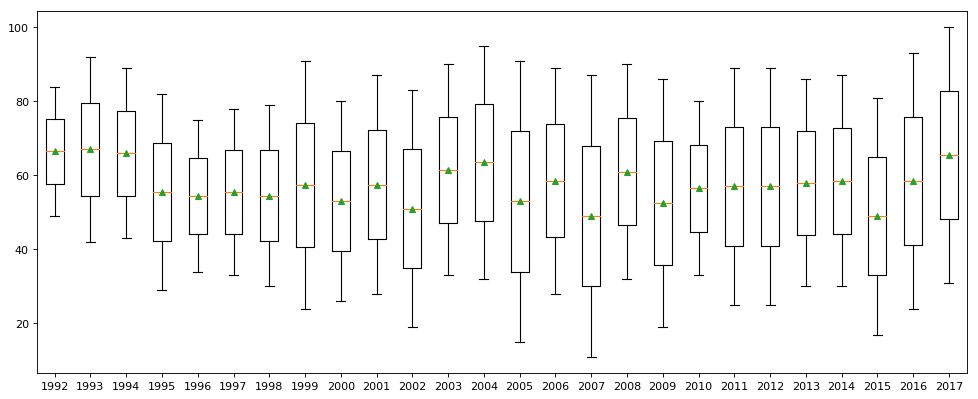

In [10]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
x = list(difference_hist.values())
data = list(difference_hist.keys())

plt.boxplot(x=x, data=data, labels=data, showmeans=True)
plt.show()

##### <center>This figure shows the box plots of the points obtained in the premier league</center>

##### From this box plot we can find that
- *2007 has the least number of points obtained*
- *2017 has the highest number of points obtained*
- *1992 had the lowest difference between the highest point scoring club and lowest point scoring club*
- *2005 has the largest difference between the highest point scoring club and lowest point scoring club*
- *More Stats can be extracted from this box plot*

### <center>**Getting the best place of each and every club**</center>

In [11]:
best_place_dict = {}
best_place_date_dict = {}
for i in range(total_seasons):
    season_date = i + start_season_year
    for j in range(total_teams):
        team_name = data_dictionary[season_date].loc[str(j+1)][0]
        # # Check whether the team is already in the dictionary
        if team_name in best_place_dict:
            # # Compare the best place from the old place
            if best_place_dict[team_name] > j+1:
                best_place_dict[team_name] = j+1
        else:
            best_place_dict[team_name] = j+1
            best_place_date_dict[team_name] = season_date

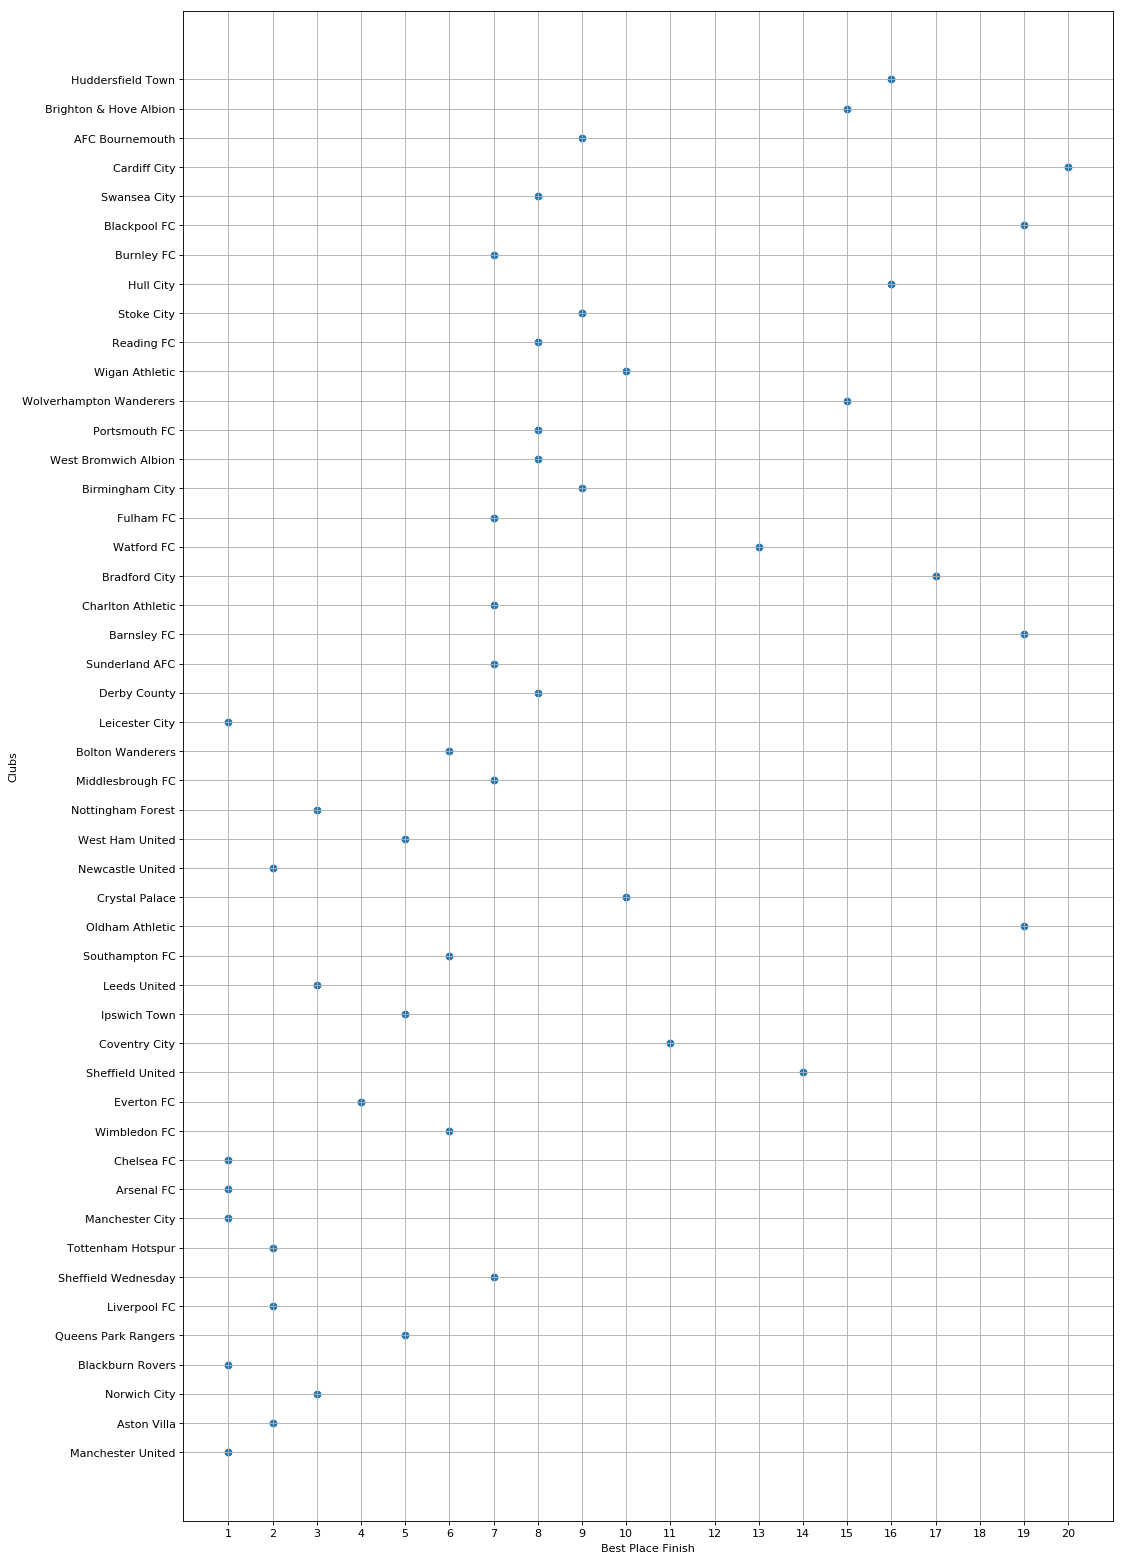

In [12]:
figure(num=None, figsize=(15, 25), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Best Place Finish')
plt.ylabel('Clubs')

x_ticks = np.arange(1, 21)

plt.grid(axis='both')
plt.xticks(x_ticks)
plt.scatter(x=best_place_dict.values(), y=best_place_dict.keys())

##### <center>This figure shows the scatter plot of the clubs with their best place finish in the premier league</center>

##### From this scatter plot we can find that
- *There are only 6 clubs who have won the premier league*
- *There are no clubs whose best place finish is the 12th place*
- *Cardiff is the only club who has never had a best place finish above 20th place*
- *There are only 48 teams who have competed in the premier league on the span of 26 years*
- *Blackburn Rovers are the only team to won the premier league and relegated*

### <center>**Getting the teams that has never been relegated after entry to the premier league**</center>

In [13]:
for i in range(total_seasons):
    season_date = i + start_season_year
    for j in range(relegation_count):
        team_name = data_dictionary[season_date].loc[str(relegation_threshold + j)][0]
        if team_name in best_place_date_dict:
            del best_place_date_dict[team_name]

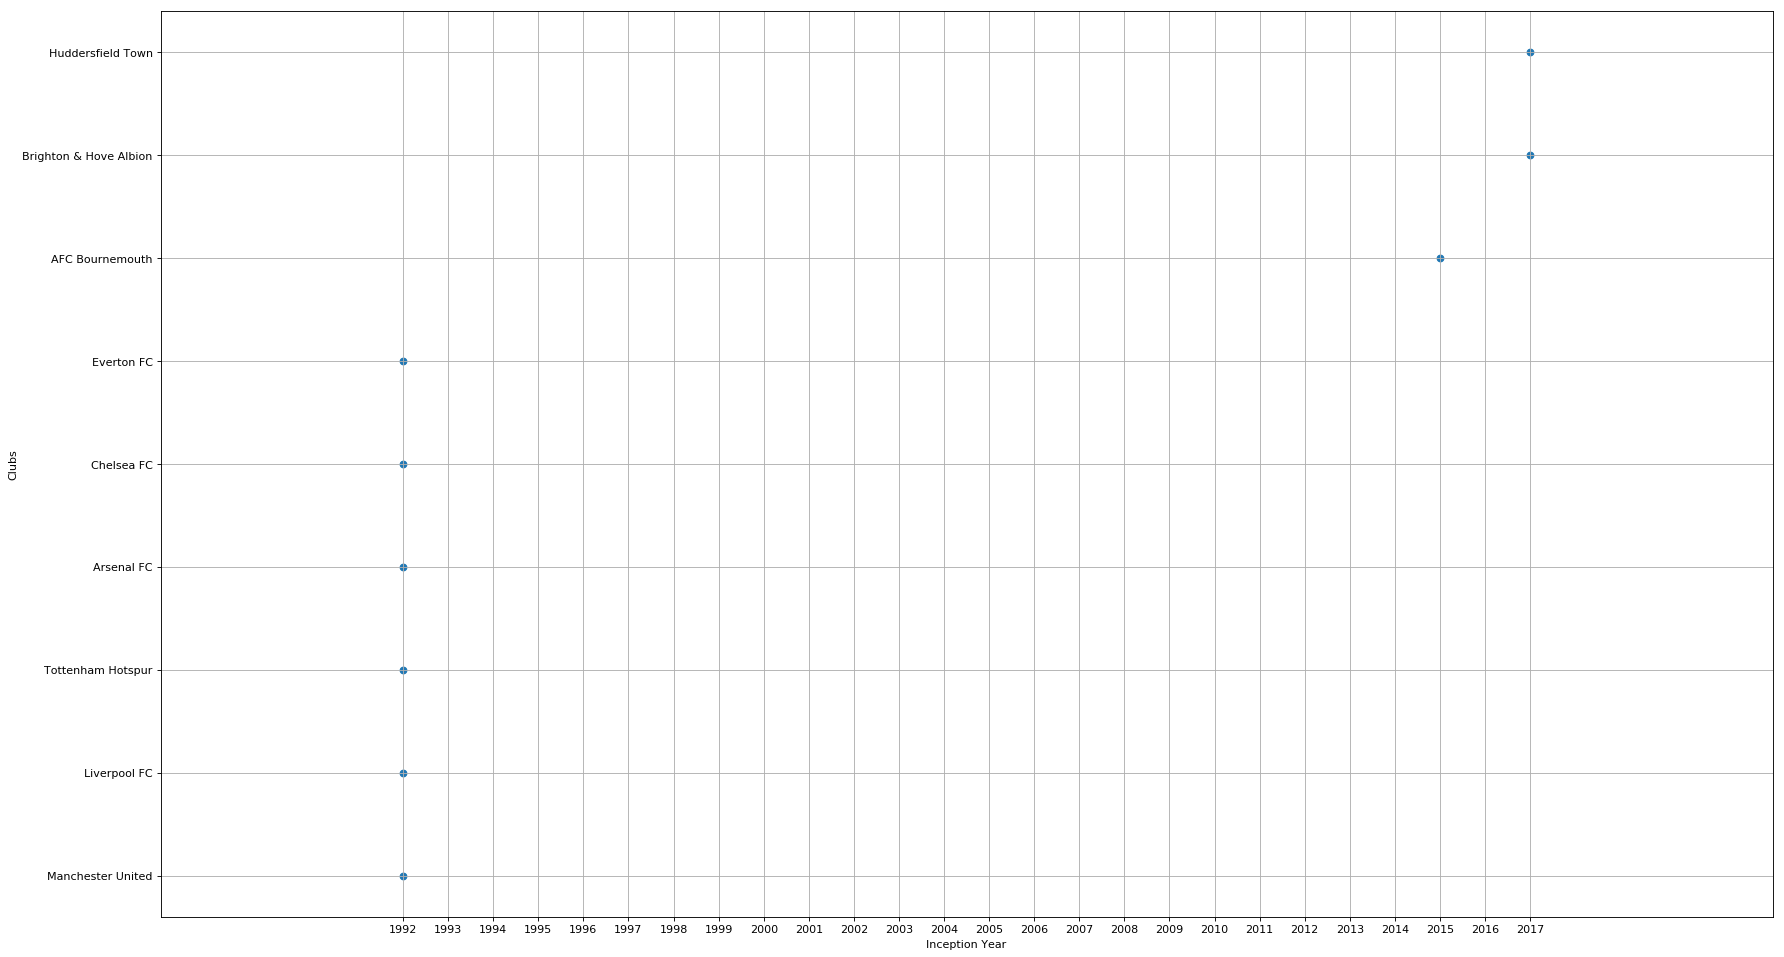

In [14]:
figure(num=None, figsize=(26, 15), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Inception Year')
plt.ylabel('Clubs')

x_tick = np.arange(1992, 2018, 1)

plt.grid(axis='both')
plt.xticks(x_tick)
plt.scatter(x=best_place_date_dict.values(), y=best_place_date_dict.keys())

##### <center>This figure shows the scatter plot of the clubs with their top flight stay and never relegated</center>

##### From this scatter plot we can find that
- *There are only 6 clubs who stayed on the top flight and never relegated*
- *3 clubs have stayed on the top flight and aren't related upto now*

### <center>**Getting the maximum number of wins from the teams**</center>

In [15]:
total_wins_dict = {}
for i in range(total_seasons):
    season_date = i + start_season_year
    for j in range(total_teams):
        team_name = data_dictionary[season_date].loc[str(j+1)][0]
        wins = data_dictionary[season_date].loc[str(j+1)][2]
        if team_name in total_wins_dict:
            total_wins_dict[team_name] += int(wins)
        else:           
            total_wins_dict[team_name] = int(wins)

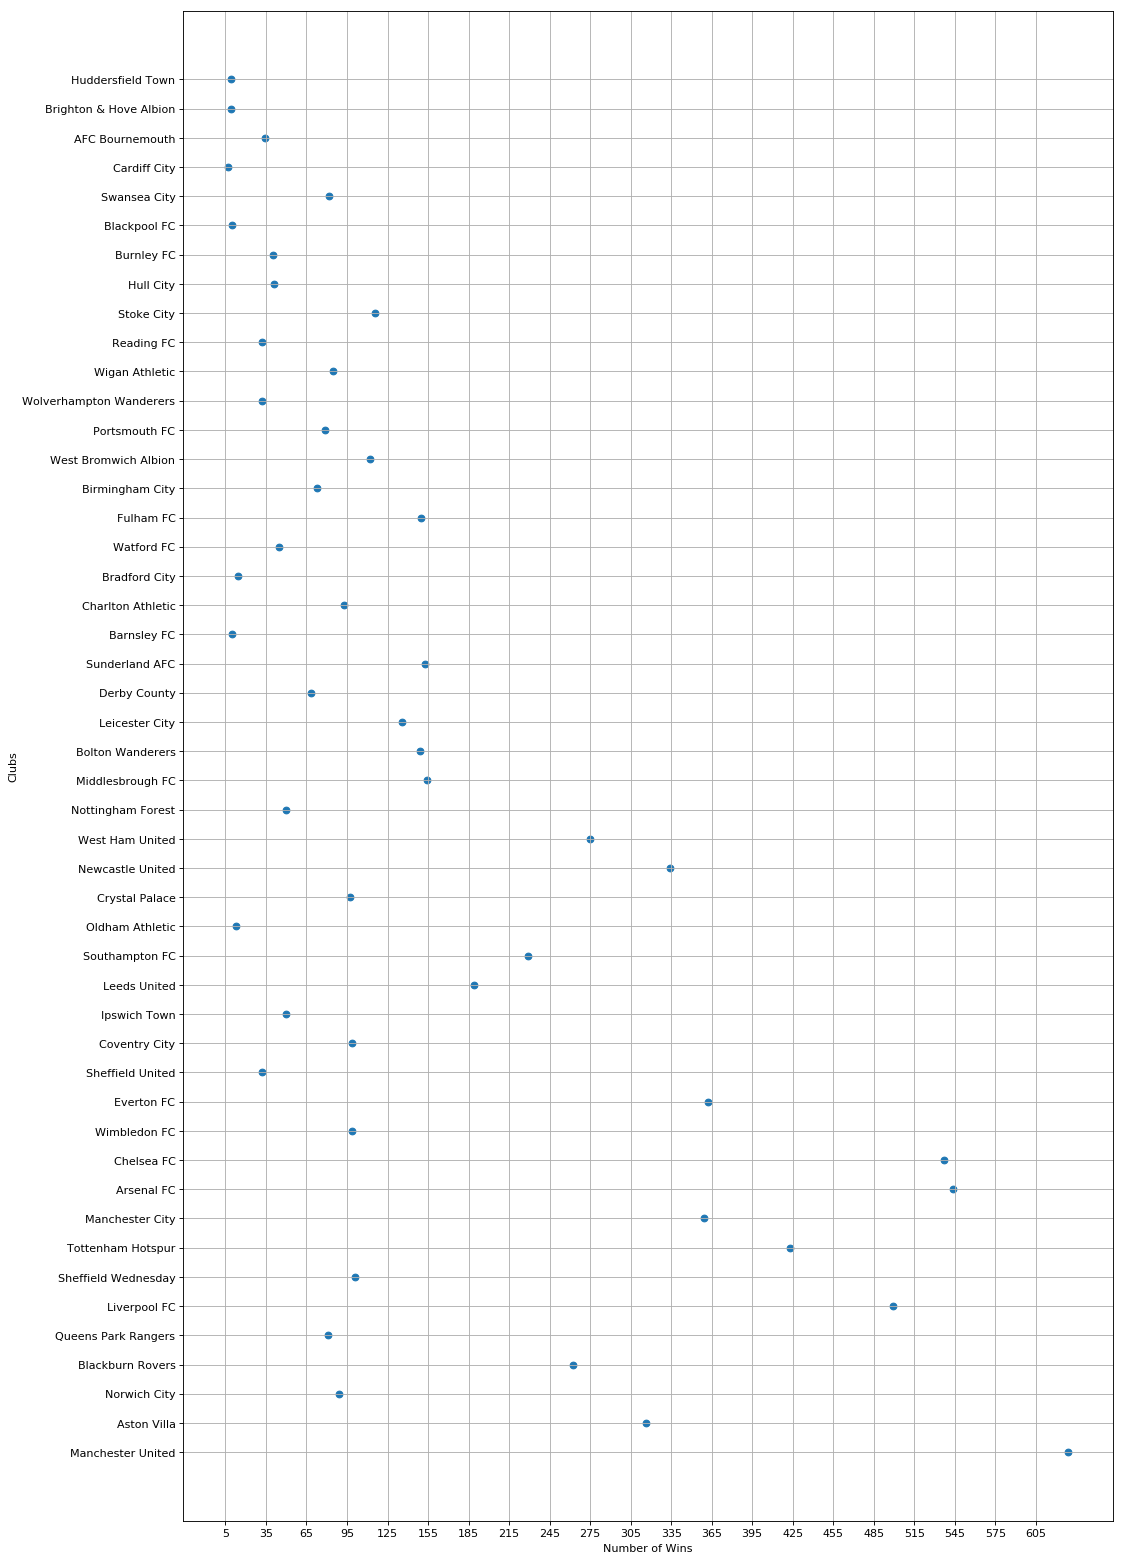

In [16]:
figure(num=None, figsize=(15, 25), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Number of Wins')
plt.ylabel('Clubs')

x_ticks = np.arange(5, 630, 30)

plt.grid(axis='both')
plt.xticks(x_ticks)
plt.scatter(x=total_wins_dict.values(), y=total_wins_dict.keys())

##### <center>This figure shows the scatter plot of the clubs with their wins</center>

##### From this box plot we can find that
- *Manchester United has the most wins spanning 600+ wins on their top flight stay*
- *Arsenal and Chelsea are 2nd and 3rd place with 520+ wins*

##### This is my first crack on data analysis. Hope you like it :). More analysis can be done from this raw data so contributions are always welcomed:). If there are any bugs, they are always welcomed!!

##### Notebook Created by: [Sulabh Shrestha](https://github.com/codexponent/)
###### - Connect with me on [Linkedin](https://www.linkedin.com/in/sulabhshrestha/) & [Twitter](http://www.twitter.com/codexponent)